# 3. 비지도 학습과 데이터 전처리

### 3.4 차원 축소, 특성 추출, 매니폴드 학습

- 비지도 학습을 수행하는데 있어서 데이터 변형이 필요
- 시각화, 압축, 추가적인 처리를 통해 정보가 잘 드러나도록 표현

### 3.4.2 t-SNE를 이용한 매니폴드 학습
- 매니폴드 학습 알고리즘
    - 시각화 알고리즘들원 훨씬 복잡한 매핑을 만들어 더 나은 시각화 제공
- t-SNE
    - 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것
    - 2차원에 무작위로 표현 후 원본 특성 공간에서 가까운 포인트에 가깝게, 멀리 떨어진 포인트는 멀어지게 만듬

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split

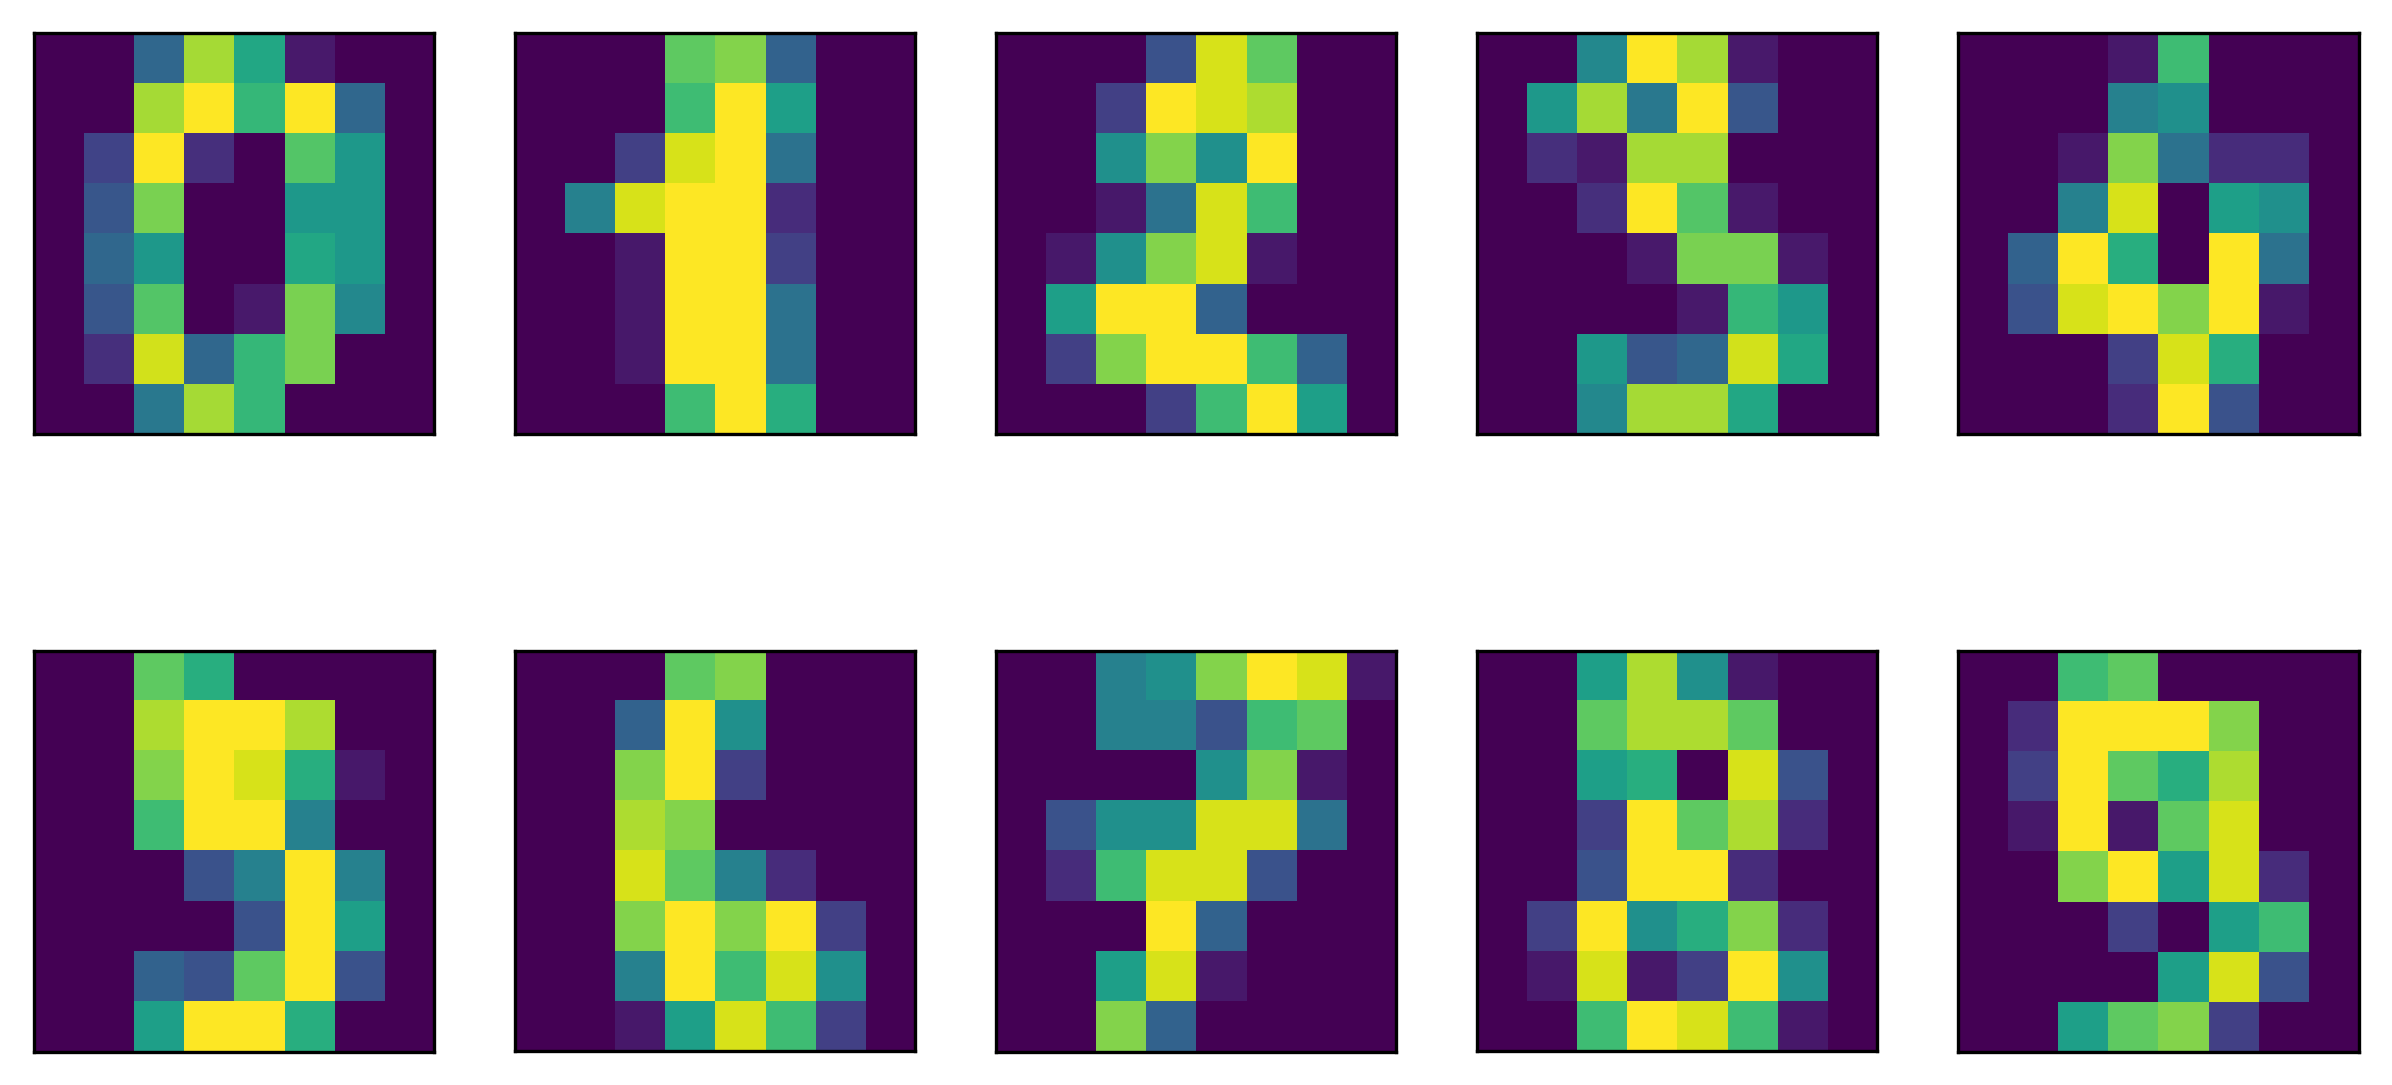

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

- PCA 를 사용해 데이터를 2차원으로 축소해 시각화
- 두개의 주성분을 이용해 그래프를 그리고 각 샘프을 해당 클래스의 숫자로 나타냄

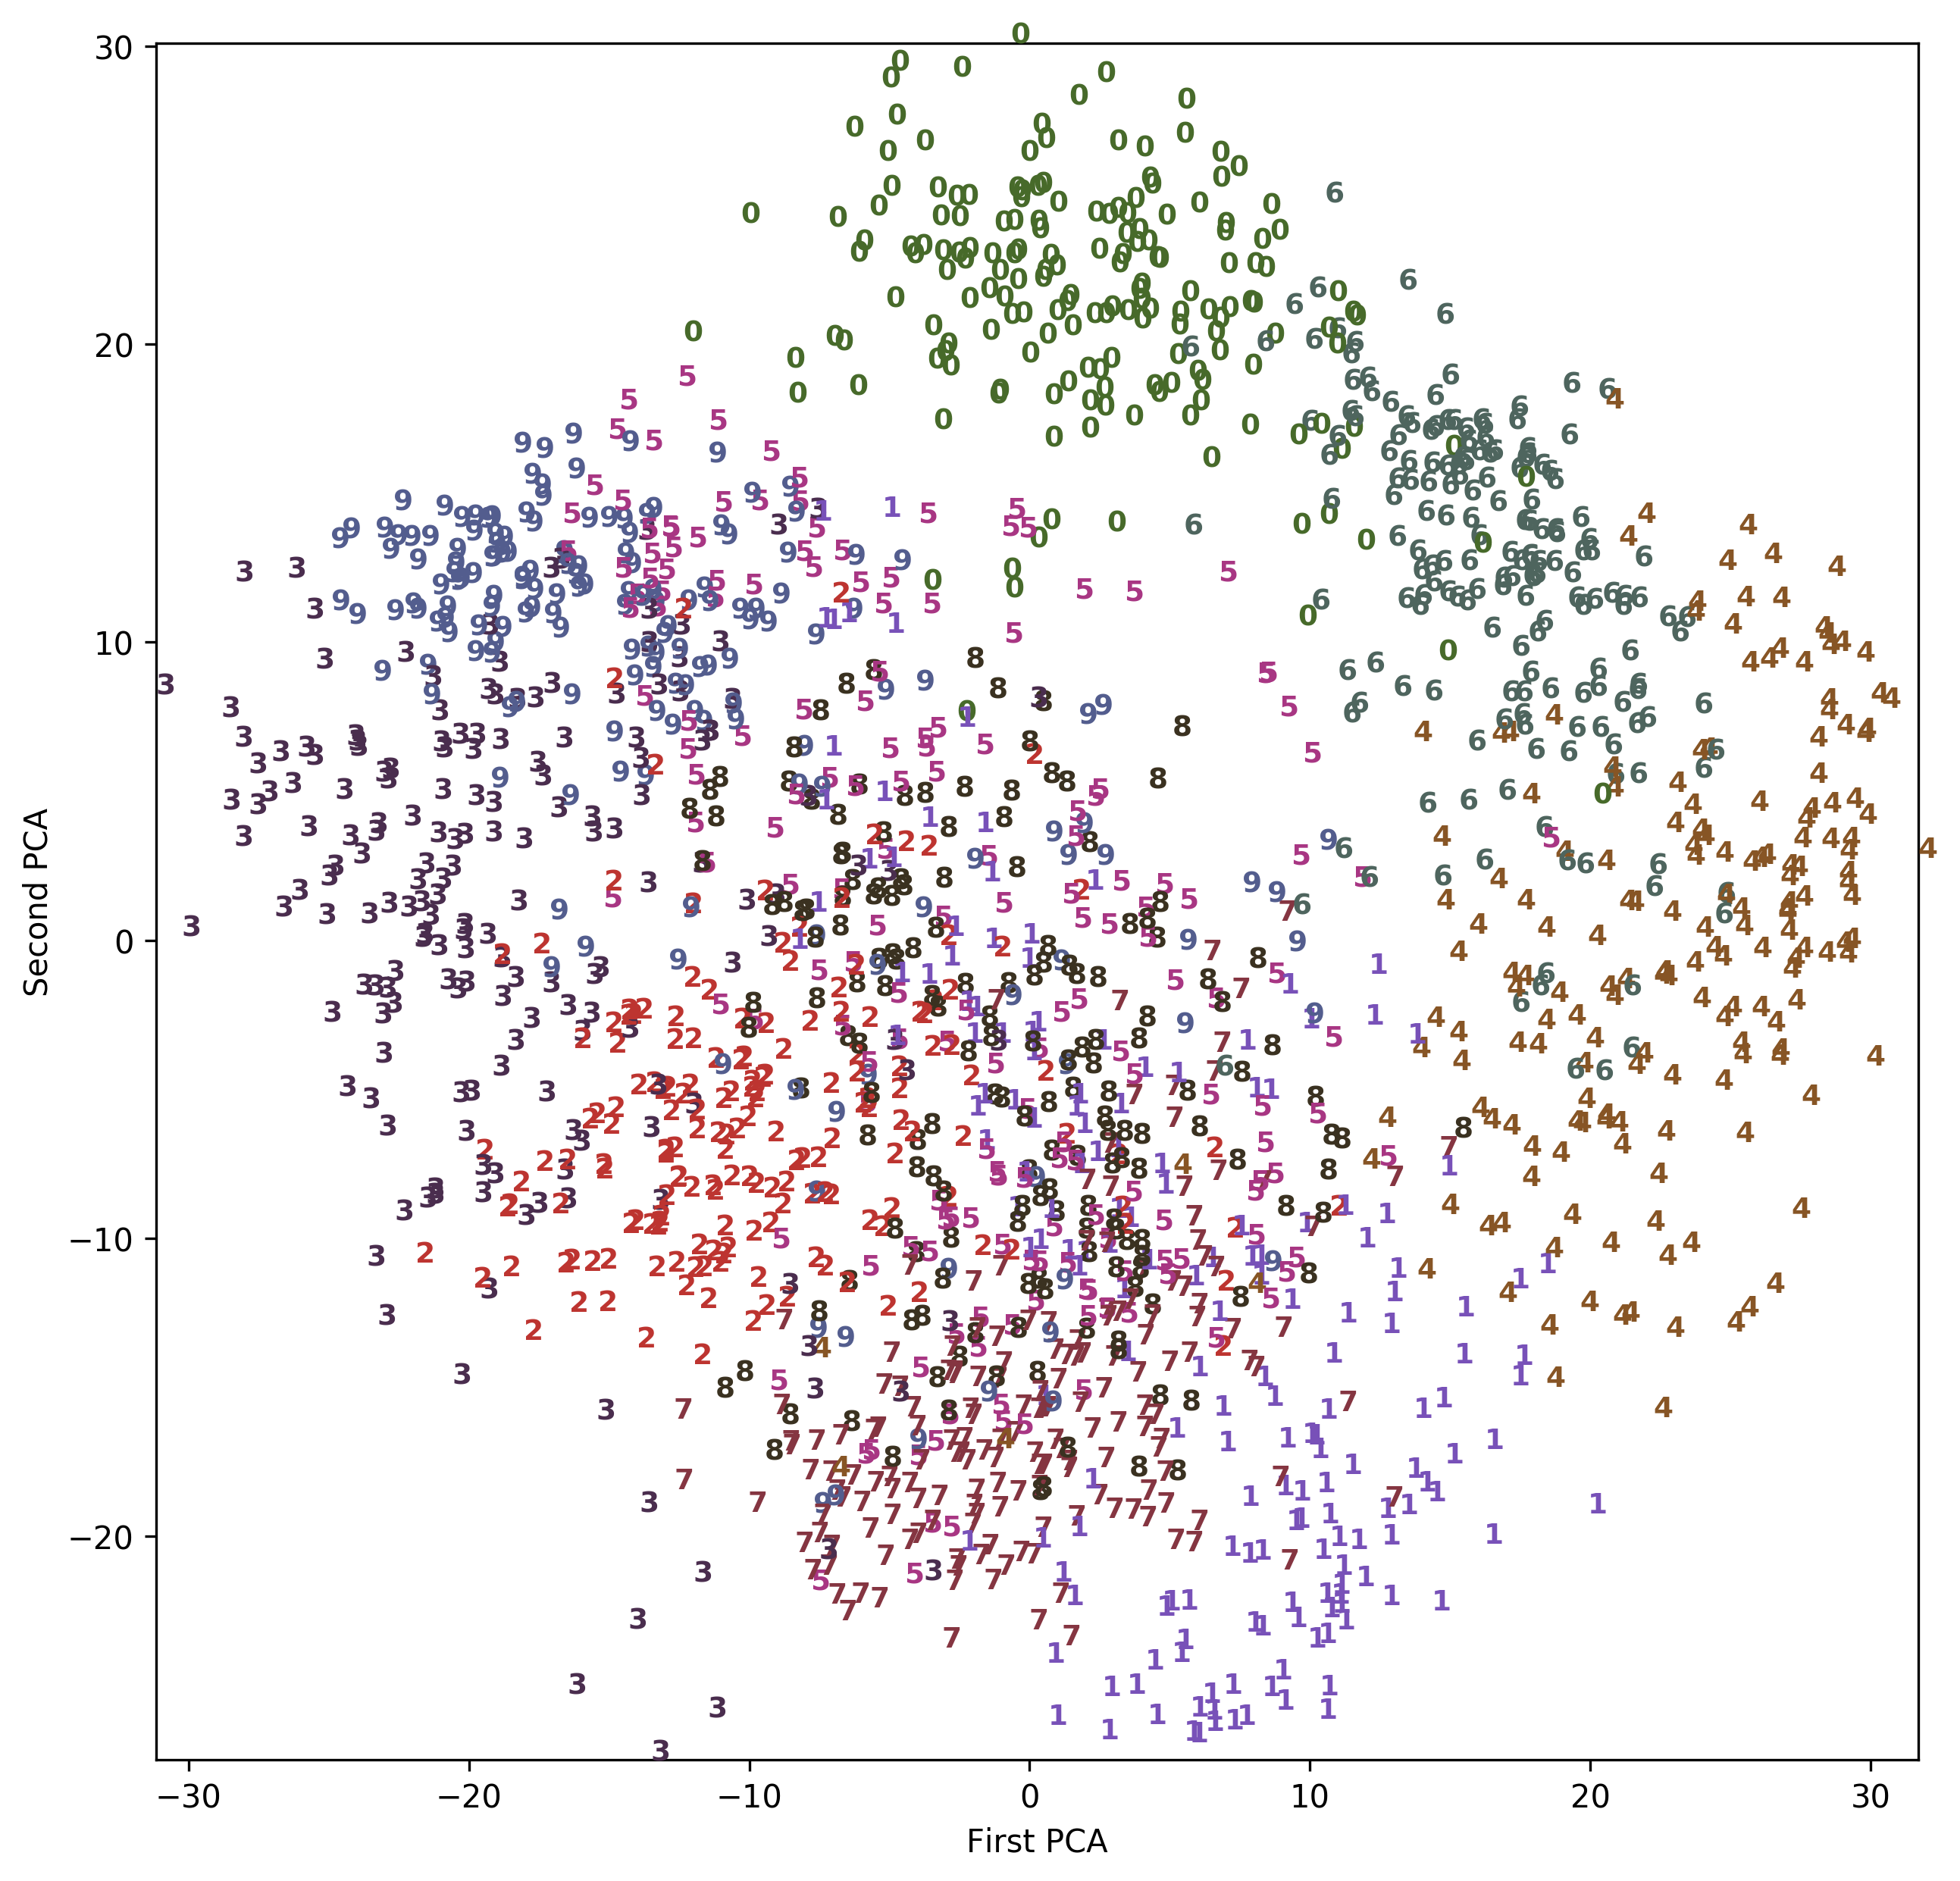

In [8]:
# PCA 모델을 생성
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터 변환
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First PCA")
plt.ylabel("Second PCA")

- 실제 숫자를 활용한 산점도

- t-SNE를 적용한 결과와 비교

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 하는 메서드가 없으므로 대신 fit_transform을 사용
digits_tsne = tsne.fit_transform(digits.data)

In [19]:
print(len(digits.data))

1797


In [20]:
digits_tsne[:, 0].min()

-1.506411259310685e+34

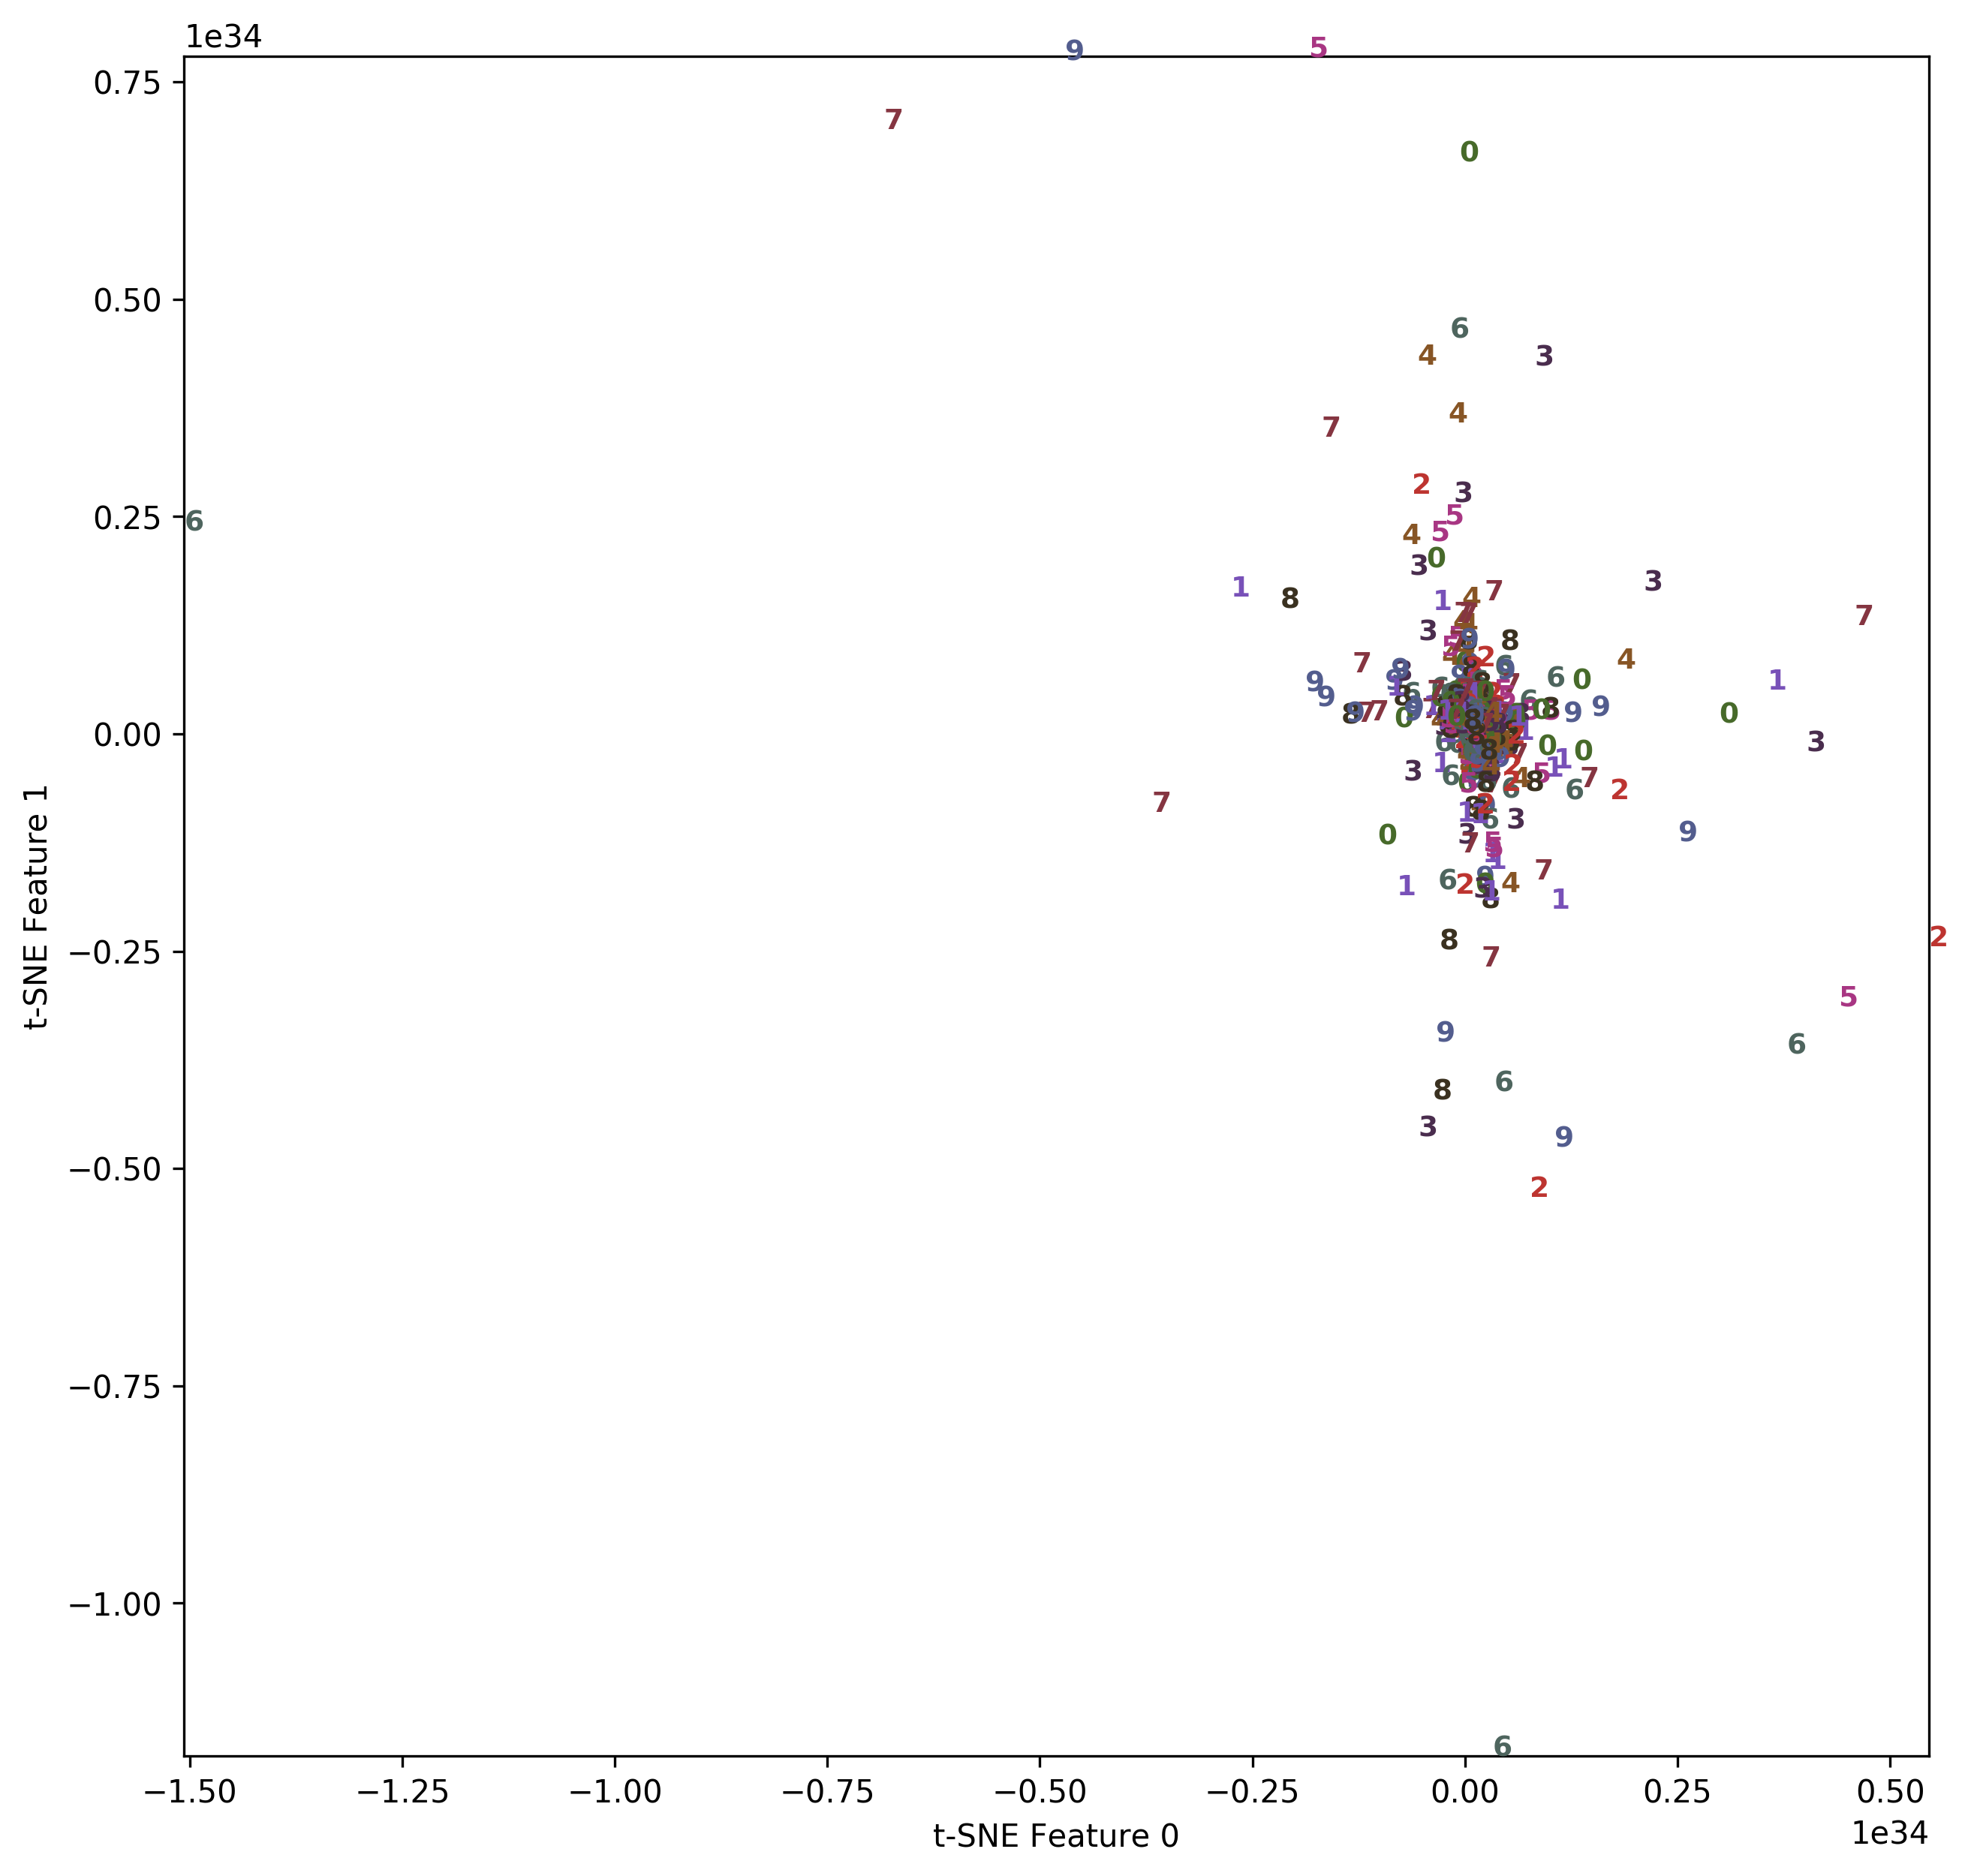

In [21]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE Feature 0")
plt.ylabel("t-SNE Feature 1")